#### Image classification example using the MLP MNIST dataset

In [1]:
### Data import
from sklearn.datasets import load_digits
data = load_digits().data
target = load_digits().target
print(data.shape)
print(target.shape)

(1797, 64)
(1797,)


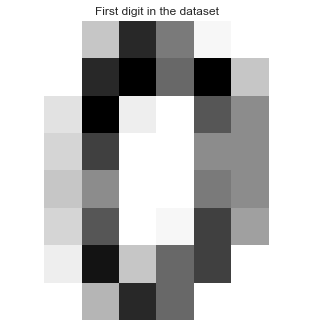

In [6]:
## Data visulization
import matplotlib.pyplot as plt

plt.style.use("seaborn")
a = data[0].reshape(8,8)
plt.imshow(a)
plt.title("First digit in the dataset")
plt.axis("off")
plt.show()

In [13]:
### Data preprocessing to feed to (feed forward net or MLP)
X = data
print("The shape of the input is {} \n\n\n".format(X.shape))

from keras.utils import np_utils
Y_ = np_utils.to_categorical(target)


print("The shape after preprocessing \n")
from sklearn.model_selection import train_test_split

X_Train,X_Test,Y_Train,Y_Test = train_test_split(X,Y_,test_size = 0.2)
print("The shape of X_Train is {}".format(X_Train.shape))
print("The shape of Y_Train is {}".format(Y_Train.shape))
print("The shape of X_Test is {}".format(X_Test.shape))
print("The shape of Y_Test is {}".format(Y_Test.shape))

The shape of the input is (1797, 64) 



The shape after preprocessing 

The shape of X_Train is (1437, 64)
The shape of Y_Train is (1437, 10)
The shape of X_Test is (360, 64)
The shape of Y_Test is (360, 10)


In [20]:
## model
from keras.layers import Dense
from keras.models import Sequential

model = Sequential()
model.add(Dense(units = 128,activation = 'relu' , input_shape=(64,)))
model.add(Dense(units = 64,activation = 'relu'))
model.add(Dense(units = 32,activation = 'relu'))
model.add(Dense(units = 10,activation = 'softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                330       
Total params: 18,986
Trainable params: 18,986
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(optimizer='adam',loss='categorical_crossentropy')

In [22]:
model.fit(X_Train,Y_Train,epochs=12,batch_size=8)

Epoch 1/12
1437/1437 [==============================] - 1s 455us/step - loss: 0.8212
Epoch 2/12
1437/1437 [==============================] - 0s 264us/step - loss: 0.1617
Epoch 3/12
1437/1437 [==============================] - 0s 261us/step - loss: 0.0881
Epoch 4/12
1437/1437 [==============================] - 0s 263us/step - loss: 0.0579
Epoch 5/12
1437/1437 [==============================] - 0s 287us/step - loss: 0.0504
Epoch 6/12
1437/1437 [==============================] - 0s 267us/step - loss: 0.0447
Epoch 7/12
1437/1437 [==============================] - 0s 255us/step - loss: 0.0213
Epoch 8/12
1437/1437 [==============================] - 0s 252us/step - loss: 0.0257
Epoch 9/12
1437/1437 [==============================] - 0s 255us/step - loss: 0.0213
Epoch 10/12
1437/1437 [==============================] - 0s 259us/step - loss: 0.0183
Epoch 11/12
1437/1437 [==============================] - 0s 259us/step - loss: 0.0036
Epoch 12/12
1437/1437 [==============================] - 0s 263

In [36]:
y_pred = model.predict_classes(X_Test)
print(y_pred)

[1 3 0 6 9 6 7 3 7 9 4 9 4 1 9 2 7 4 9 6 8 4 4 1 2 6 8 9 5 9 7 9 5 7 3 9 0
 0 5 1 7 6 7 5 9 5 4 3 2 1 5 0 0 1 6 6 5 4 4 8 6 3 3 1 1 1 8 6 5 1 4 9 2 6
 6 6 2 3 1 4 7 3 7 0 0 0 1 3 1 5 0 3 9 9 9 9 7 2 0 9 6 9 9 8 7 8 6 6 2 8 2
 5 1 2 2 3 5 4 5 8 2 6 7 6 8 4 6 3 9 8 1 7 0 4 5 5 8 7 6 0 5 4 0 1 3 1 9 9
 9 6 0 8 7 2 5 3 8 2 6 3 2 6 6 4 4 5 5 0 5 7 6 5 2 4 7 7 6 2 4 3 4 3 2 8 0
 9 2 7 6 3 3 8 1 1 0 8 8 6 6 4 4 0 0 2 4 9 4 2 4 1 8 0 7 9 6 6 2 9 0 7 9 1
 4 7 6 1 0 0 0 8 8 0 5 7 0 4 0 1 9 0 1 7 7 1 7 8 5 3 7 1 4 8 1 4 8 1 9 0 1
 5 2 0 1 9 6 3 4 4 6 3 7 9 9 3 3 9 9 7 3 9 9 0 8 3 2 1 1 9 3 3 2 1 4 2 6 0
 4 3 3 5 3 4 0 5 2 3 7 1 5 6 5 1 3 0 6 8 1 9 1 8 3 9 8 2 0 5 6 3 9 0 6 9 5
 8 1 1 1 7 7 3 9 6 6 5 5 0 5 5 0 3 2 3 2 3 7 8 1 2 5 3]
